In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import healpy as hp
import os
from tqdm import tqdm
sys.path.append('..')
import pickle as pl
import scipy.optimize as op
import corner
import emcee
from getdist import plots, MCSamples
import getdist
import matplotlib
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
from solat_cb.simulation import CMB, BandpassInt, Foreground, Mask, Noise, LATsky, SATsky
from solat_cb.spectra import Spectra
from solat_cb.calibration import Sat4Lat

In [3]:
lib ='/pscratch/sd/l/lonappan/SOLATcalib'
nside = 512
lmax = 3*nside - 1
cb_method = 'iso'
beta = 0.35
dust = 10
synch = 5
alpha_sat = [0.05,0.05,-0.08,-0.08,.07,.07]
alpha_lat = [-0.1,-0.1,0.2,0.2,.15,.15]
atm_noise = True
nsplits = 1
bandpass = False
deconv_maps = False

In [4]:
lat = LATsky(lib,nside,cb_method,dust,synch,alpha_lat,beta,atm_noise=atm_noise,nsplits=nsplits,bandpass=bandpass,deconv_maps=deconv_maps)

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic cosmic birefringence model selected
Mask : INFO - Downgrading mask LAT resolution
Noise : INFO - Noise Model:[LAT] White + 1/f noise v3.1.1


In [5]:
sat = SATsky(lib,nside,cb_method,dust,synch,alpha_sat,beta,atm_noise=atm_noise,nsplits=nsplits,bandpass=bandpass,deconv_maps=deconv_maps)

CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic cosmic birefringence model selected
Mask : INFO - Downgrading mask SAT resolution
/pscratch/sd/l/lonappan/software_pkgs/cb/lib/python3.10/site-packages/so_models_v3/SO_Noise_Calculator_Public_v3_1_1.py:215: RuntimeWarning: divide by zero encountered in scalar divide
  cov_weight[i,j] += ( tube_count * N_tels /
Noise : INFO - Noise Model:[SAT] White + 1/f noise v3.1.1


In [6]:
latspectra = Spectra(lat,parallel=2,galcut=40,binwidth=5)
satspectra = Spectra(sat,parallel=2,galcut=40,CO=False,PS=False,binwidth=5)

Spectra : INFO - Reading apodised mask from /pscratch/sd/l/lonappan/SOLATcalib/LAT_atm_noise_1splits/spectra_512_aposcale2p0_common/workspaces/mask_N512_aposcale2p0_CO_PS_G40.fits
Spectra : INFO - Reading coupling Matrix from /pscratch/sd/l/lonappan/SOLATcalib/LAT_atm_noise_1splits/spectra_512_aposcale2p0_common/workspaces/coupling_matrix_N512_fsky0p24_aposcale2p0_bw5_CO_PS_G40.fits
Spectra : INFO - Parallelized double loop
Spectra : INFO - Reading apodised mask from /pscratch/sd/l/lonappan/SOLATcalib/SAT_atm_noise_1splits/spectra_512_aposcale2p0_common/workspaces/mask_N512_aposcale2p0_G40.fits
Spectra : INFO - Reading coupling Matrix from /pscratch/sd/l/lonappan/SOLATcalib/SAT_atm_noise_1splits/spectra_512_aposcale2p0_common/workspaces/coupling_matrix_N512_fsky0p09_aposcale2p0_bw5_G40.fits
Spectra : INFO - Parallelized double loop


In [23]:
c = Sat4Lat(lib,latspectra,satspectra,50,500,0.07,alpha_sat,alpha_lat,beta)

CMB : INFO - Loading CMB power spectra from file
INFO:CMB:Loading CMB power spectra from file
CMB : INFO - Isotropic cosmic birefringence model selected
INFO:CMB:Isotropic cosmic birefringence model selected


Removed no burn in


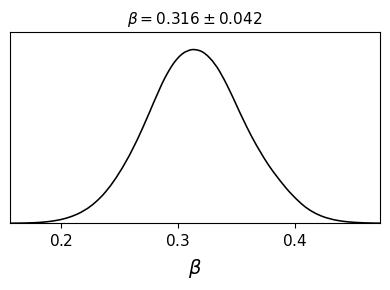

In [33]:
c.plot_getdist(100,2000,avoid_sat=False,beta_only=True)
plt.savefig('full.pdf',dpi=300,bbox_inches='tight')